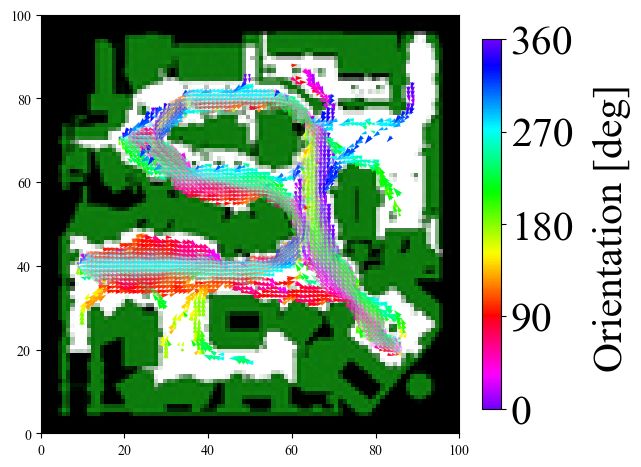

In [2]:
############ For plot cliff maps for online paper mapf #############

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import utils
import warnings


def read_cliff_map_data(cliff_map_file):
    if not os.path.exists(cliff_map_file):
        return None
    
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "velocity", "motion_angle",
                    "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]

    return data.to_numpy()

def read_cliff_map_data_reversespeedangle(cliff_map_file):
    if not os.path.exists(cliff_map_file):
        return None
    
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "motion_angle", "velocity",
                    "cov4", "cov2", "cov3", "cov1", "weight", "motion_ratio"]
    data = data[["x", "y", "velocity", "motion_angle", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]]

    return data.to_numpy()

def read_cliff_map_data_new_online(cliff_map_file):
    if not os.path.exists(cliff_map_file):
        return None
    
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "velocity", "motion_angle", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio", "decay_rate"]
    data['motion_angle'] = np.mod(data['motion_angle'], 2 * np.pi)
    data['weight'] = data.groupby(['x', 'y'])['weight'].transform(lambda x: x / x.sum())
    
    return data.to_numpy()


def read_cliff_map_data_matlab(cliff_map_file):
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "motion_angle", "velocity",
                    "cov1", "cov2", "cov3", "cov4", "weight", "obs", "motion_ratio"]

    data = data.drop(columns=["obs"])
    return data.to_numpy()

def plot_cliff_map_with_weight(cliff_map_data):

    ## Only leave the SWND with largest weight
    max_index_list = []
    
    location = cliff_map_data[0, :2]
    weight = cliff_map_data[0, 8]
    max_weight_index = 0

    for i in range(1, len(cliff_map_data)):
        tmp_location = cliff_map_data[i, :2]
        if (tmp_location == location).all():
            tmp_weight = cliff_map_data[i, 8]
            if tmp_weight > weight:
                max_weight_index = i
                weight = tmp_weight
        else:
            max_index_list.append(max_weight_index)
            location = cliff_map_data[i, :2]
            weight = cliff_map_data[i, 8]
            max_weight_index = i

    max_index_list.append(max_weight_index)

    (u, v) = utils.pol2cart(cliff_map_data[:, 2], cliff_map_data[:, 3])
    weight = cliff_map_data[:, 8]

    colors = cliff_map_data[:, 3]  * 180 / np.pi
    colors = np.append(colors, [0, 360])
    norm = Normalize()
    norm.autoscale(colors)
    colormap = cm.hsv

    for i in range(len(cliff_map_data)):
    # for i in range(200):
        ## For only plot max weight:
        # if i in max_index_list:
            # plt.quiver(cliff_map_data[i, 0], cliff_map_data[i, 1], u[i], v[i], color=colormap(norm(colors))[i], alpha=1, cmap="hsv",angles='xy', scale_units='xy', scale=0.7)
        ## For only plot one point:
        # if cliff_map_data[i, 0] == 20 and cliff_map_data[i, 1] == -13:
        plt.quiver(cliff_map_data[i, 0], cliff_map_data[i, 1], u[i], v[i], color=colormap(norm(colors))[i], alpha=weight[i], cmap="hsv",angles='xy', scale_units='xy', scale=0.5)
        # plt.quiver(cliff_map_data[i, 0], cliff_map_data[i, 1], u[i], v[i], color=colormap(norm(colors))[i], alpha=weight[i], cmap="hsv",angles='xy', scale_units='xy', scale=0.7)



    ############### To change colorbar for rotate AAAI paper ################
    shift_fraction = -1/4
    original_cmap = cm.hsv
    shifted_cmap = matplotlib.colors.ListedColormap(original_cmap(np.mod(np.linspace(shift_fraction, 1 + shift_fraction, 256), 1.)))
    colormap = shifted_cmap
    #########################################################################
    
    
    
    sm = cm.ScalarMappable(cmap=colormap, norm=norm)
    cbar = plt.colorbar(sm, shrink = 0.8, ticks=[0, 90, 180, 270, 360], fraction=0.05)
    cbar.ax.tick_params(labelsize=30)
    plt.text(132, 17,"Orientation [deg]", rotation='vertical', fontsize=30)


def plot_cliff(cliff_map_data):
    (u, v) = utils.pol2cart(cliff_map_data[:, 2], cliff_map_data[:, 3])
    color = cliff_map_data[:, 3]
    # plt.quiver(cliff_map_data[:, 0], cliff_map_data[:, 1], u, v, color)

    plt.quiver(cliff_map_data[:, 0], cliff_map_data[:, 1], u, v, color, alpha=0.8, cmap="hsv")

versions = [
    "all", "interval", "online", "window"
]

# exp = "initial"
# exp = "update"

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']

# for exp in ["initial", "update"]:
for exp in ["update"]:
# for exp in ["initial"]:
    # for version in ["online"]:
    for version in ["all"]:
    # for version in ["interval", "online", "all", "window"]:
    # for version in ["window"]:
        # for batch_num in range(1, 11):
        for batch_num in range(5, 10):
        # for batch_num in range(1, 2):
            if version == "online":
                cliff_map_data = read_cliff_map_data_new_online(f"online_mod_res_mapf/{version}_newdata/{exp}_split_b{batch_num}_{version}.csv")
                # cliff_map_data = read_cliff_map_data_reversespeedangle(f"online_mod_res_mapf/{version}_newdata/{exp}_split_b{batch_num}_{version}.csv")
            elif version == "window":
                # cliff_map_data = read_cliff_map_data(f"online_mod_res_mapf/{version}_newdata/{exp}_split_b{batch_num}_{version}.csv")
                cliff_map_data = read_cliff_map_data_reversespeedangle(f"online_mod_res_mapf/{version}_newdata/for_nll/{exp}_split_b{batch_num}_{version}.csv")
            elif version == "interval":
                # cliff_map_data = read_cliff_map_data(f"online_mod_res_mapf/{version}_newdata/{exp}_split_b{batch_num}_{version}.csv")
                cliff_map_data = read_cliff_map_data_reversespeedangle(f"online_mod_res_mapf/{version}_newdata/for_nll/{exp}_split_b{batch_num}_{version}.csv")
            elif version == "all":
                # cliff_map_data = read_cliff_map_data_reversespeedangle(f"online_mod_res_mapf/all_v3/paths_den_rebuttal_cliff_grid_1_corl_combine_update_b{batch_num}.csv")
                # cliff_map_data = read_cliff_map_data_reversespeedangle(f"online_mod_res_mapf/all_newdata/for_nll/{exp}_split_b{batch_num}_all.csv")
                cliff_map_data = read_cliff_map_data_reversespeedangle(f"online_mod_res_mapf/check_history_cliff/updatev2/cliff_b{batch_num}.csv")
            if cliff_map_data is None:
                continue
            plt.clf()
            plt.close('all')
            plt.figure(figsize=(6, 6), dpi=100)
            plt.subplot(111, facecolor='grey')
            img = plt.imread(f"den_small.png")
            plt.imshow(img, cmap='gray', vmin=0, vmax=255, extent=[0, 100, 0, 100])
            plot_cliff_map_with_weight(cliff_map_data)
            # os.makedirs(f"online_mod_res_mapf/{version}_newdata/for_nll/figures", exist_ok=True)
            # plt.savefig(f"online_mod_res_mapf/{version}_newdata/for_nll/figures/{exp}_split_b{batch_num}_{version}.png", dpi=100)
            
            os.makedirs(f"online_mod_res_mapf/check_history_cliff/figures", exist_ok=True)
            plt.savefig(f"online_mod_res_mapf/check_history_cliff/figures/{exp}_split_b{batch_num}_{version}.png", dpi=100)

            # plt.axis('off')
            # plt.savefig(f"rebuttal_figure/{exp}_split_b{batch_num}_{version}.png", dpi=100, bbox_inches='tight', pad_inches=0)
            # plt.tight_layout()
            # plt.savefig(f"rebuttal_figure/colorbar_new.pdf", dpi=100)
            # plt.savefig(f"rebuttal_figure/colorbar_new.png", dpi=200, bbox_inches='tight', pad_inches=0)


In [29]:
exp = "initial"
# exp = "update"

version = "online"


cliff_map_data = read_cliff_map_data_new_online(f"online_mod_res_mapf/{version}_v2/{exp}_split_b2_{version}.csv")
## get set of locations in cliff_map_data
locations1 = set()
for i in range(len(cliff_map_data)):
    locations1.add((cliff_map_data[i, 0], cliff_map_data[i, 1]))
    
# print(locations1)


cliff_map_data = read_cliff_map_data_new_online(f"online_mod_res_mapf/{version}_v2/{exp}_split_b3_{version}.csv")
## get set of locations in cliff_map_data
locations2 = set()
for i in range(len(cliff_map_data)):
    locations2.add((cliff_map_data[i, 0], cliff_map_data[i, 1]))
    
# get the ones in location1 but not in location2
diff = locations1 - locations2
print(locations1 - locations2)
print(len(diff))

{(52.0, 40.0), (69.0, 65.0), (37.0, 58.0), (69.0, 77.0), (33.0, 63.0), (32.0, 64.0), (68.0, 75.0), (59.0, 45.0), (50.0, 39.0), (34.0, 61.0), (42.0, 56.0), (69.0, 64.0), (32.0, 63.0), (33.0, 62.0), (38.0, 58.0), (63.0, 60.0), (67.0, 75.0), (49.0, 39.0), (38.0, 57.0), (63.0, 56.0), (63.0, 62.0), (68.0, 76.0)}
22


In [5]:
### Organize the update part of all_v3 data, we generate them using cliff-python in desktop
### The boundary and order of columns are different slightly, so we adjust there, for easier generate mapf path
import os
import pandas as pd
import numpy as np

def read_cliff_map_data_reversespeedangle(cliff_map_file):
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "motion_angle", "velocity",
                    "cov4", "cov2", "cov3", "cov1", "weight", "motion_ratio"]
    data = data[["x", "y", "velocity", "motion_angle", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]]

    return data


def process_initial_cliff_map_data(cliff_map_file):
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "velocity", "motion_angle", "cov4", "cov2", "cov3", "cov1", "weight", "motion_ratio"]
    data = data[["x", "y", "motion_angle", "velocity", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]]
    data['motion_angle'] = np.mod(data['motion_angle'], 2 * np.pi)
    data['weight'] = data.groupby(['x', 'y'])['weight'].transform(lambda x: x / x.sum())
    
    data["x"] = data["x"].astype(int)
    data["y"] = data["y"].astype(int)
    
    return data

def process_initial_cliff_map_data_online(cliff_map_file):
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "velocity", "motion_angle", "cov4", "cov2", "cov3", "cov1", "weight", "motion_ratio", "decay_rate"]
    data = data[["x", "y", "motion_angle", "velocity", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]]
    data['motion_angle'] = np.mod(data['motion_angle'], 2 * np.pi)
    data['weight'] = data.groupby(['x', 'y'])['weight'].transform(lambda x: x / x.sum())

    filter_condition = (data['cov1'] != 0) | (data['cov2'] != 0) | (data['cov3'] != 0) | (data['cov4'] != 0)
    data = data[filter_condition]
    
    data["x"] = data["x"].astype(int)
    data["y"] = data["y"].astype(int)

    return data

def process_update_cliff_map_data(cliff_map_file):
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "motion_angle", "velocity", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]
    
    data = data[["x", "y", "velocity", "motion_angle", "cov4", "cov2", "cov3", "cov1", "weight", "motion_ratio"]]
    data['motion_angle'] = np.mod(data['motion_angle'], 2 * np.pi)
    data['weight'] = data.groupby(['x', 'y'])['weight'].transform(lambda x: x / x.sum())
    
    data["x"] = data["x"].astype(int)
    data["y"] = data["y"].astype(int)
    
    return data

# os.makedirs(f"online_mod_res_mapf/all_newdata/for_nll", exist_ok=True)
os.makedirs(f"online_mod_res_mapf/check_history_cliff/for_nll", exist_ok=True)
# os.makedirs(f"online_mod_res_mapf/interval_newdata/for_nll", exist_ok=True)
# os.makedirs(f"online_mod_res_mapf/online_newdata/for_nll", exist_ok=True)
# os.makedirs(f"online_mod_res_mapf/window_newdata/for_nll", exist_ok=True)

# for batch_num in range(1, 11):
#     cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/all_newdata/initial_split_b{batch_num}_all.csv")
#     cliff_map_data.to_csv(f"online_mod_res_mapf/all_newdata/for_nll/initial_split_b{batch_num}_all.csv", index=False, header=False)
#     cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/all_newdata/update_split_b{batch_num}_all.csv")
#     cliff_map_data.to_csv(f"online_mod_res_mapf/all_newdata/for_nll/update_split_b{batch_num}_all.csv", index=False, header=False)

# for batch_num in range(1, 11):
#     initial_cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/interval_newdata/initial_split_b{batch_num}_interval.csv")
#     initial_cliff_map_data.to_csv(f"online_mod_res_mapf/interval_newdata/for_nll/initial_split_b{batch_num}_interval.csv", index=False, header=False)
#     update_cliff_map_data = process_initial_cliff_map_data(f"online_mod_res_mapf/interval_newdata/update_split_b{batch_num}_interval.csv")
#     update_cliff_map_data.to_csv(f"online_mod_res_mapf/interval_newdata/for_nll/update_split_b{batch_num}_interval.csv", index=False, header=False)

# for batch_num in range(1, 11):
#     initial_cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/window_newdata/initial_split_b{batch_num}_window.csv")
#     initial_cliff_map_data.to_csv(f"online_mod_res_mapf/window_newdata/for_nll/initial_split_b{batch_num}_window.csv", index=False, header=False)

# for batch_num in range(1, 2):
#     update_cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/window_newdata/update_split_b{batch_num}_window.csv")
#     update_cliff_map_data.to_csv(f"online_mod_res_mapf/window_newdata/for_nll/update_split_b{batch_num}_window.csv", index=False, header=False)
# for batch_num in range(2, 11):
#     update_cliff_map_data = process_initial_cliff_map_data(f"online_mod_res_mapf/window_newdata/update_split_b{batch_num}_window.csv")
#     update_cliff_map_data.to_csv(f"online_mod_res_mapf/window_newdata/for_nll/update_split_b{batch_num}_window.csv", index=False, header=False)

# for batch_num in range(1, 11):
#     initial_cliff_map_data = process_initial_cliff_map_data_online(f"online_mod_res_mapf/online_newdata/initialv2_split_b{batch_num}_online.csv")
#     initial_cliff_map_data.to_csv(f"online_mod_res_mapf/online_newdata/for_nll/initial_split_b{batch_num}_online.csv", index=False, header=False)
#     update_cliff_map_data = process_initial_cliff_map_data_online(f"online_mod_res_mapf/online_newdata/update_split_b{batch_num}_online.csv")
#     update_cliff_map_data.to_csv(f"online_mod_res_mapf/online_newdata/for_nll/update_split_b{batch_num}_online.csv", index=False, header=False)

for batch_num in range(5, 10):
    cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/check_history_cliff/updatev2/cliff_b{batch_num}.csv")
    cliff_map_data.to_csv(f"online_mod_res_mapf/check_history_cliff/for_nll/update_split_b{batch_num}_all.csv", index=False, header=False)


In [10]:
### Organize the update part of all_v3 data, we generate them using cliff-python in desktop
### The boundary and order of columns are different slightly, so we adjust there, for easier generate mapf path
### Compared with previous block, this is for align with online model, to be test together easier
### So velocity first, then motion_angle

import os
import pandas as pd
import numpy as np

def process_initial_cliff_map_data(cliff_map_file):
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "velocity", "motion_angle", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]

    data['motion_angle'] = np.mod(data['motion_angle'], 2 * np.pi)
    data['weight'] = data.groupby(['x', 'y'])['weight'].transform(lambda x: x / x.sum())
    
    data["x"] = data["x"].astype(int)
    data["y"] = data["y"].astype(int)
    
    return data

def process_update_cliff_map_data(cliff_map_file):
    data = pd.read_csv(cliff_map_file, header=None)
    data.columns = ["x", "y", "motion_angle", "velocity", "cov4", "cov2", "cov3", "cov1", "weight", "motion_ratio"]
    data = data[["x", "y", "velocity", "motion_angle", "cov1", "cov2", "cov3", "cov4", "weight", "motion_ratio"]]
    data['motion_angle'] = np.mod(data['motion_angle'], 2 * np.pi)
    data['weight'] = data.groupby(['x', 'y'])['weight'].transform(lambda x: x / x.sum())
    
    data["x"] = data["x"].astype(int)
    data["y"] = data["y"].astype(int)
    
    return data

os.makedirs(f"online_mod_res_mapf/all_newdata/for_nll", exist_ok=True)
os.makedirs(f"online_mod_res_mapf/interval_newdata/for_nll", exist_ok=True)
os.makedirs(f"online_mod_res_mapf/window_newdata/for_nll", exist_ok=True)

for batch_num in range(1, 11):
    cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/all_newdata/initial_split_b{batch_num}_all.csv")
    cliff_map_data.to_csv(f"online_mod_res_mapf/all_newdata/for_nll/initial_split_b{batch_num}_all.csv", index=False, header=False)
    cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/all_newdata/update_split_b{batch_num}_all.csv")
    cliff_map_data.to_csv(f"online_mod_res_mapf/all_newdata/for_nll/update_split_b{batch_num}_all.csv", index=False, header=False)

for batch_num in range(1, 11):
    initial_cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/interval_newdata/initial_split_b{batch_num}_interval.csv")
    initial_cliff_map_data.to_csv(f"online_mod_res_mapf/interval_newdata/for_nll/initial_split_b{batch_num}_interval.csv", index=False, header=False)
    update_cliff_map_data = process_initial_cliff_map_data(f"online_mod_res_mapf/interval_newdata/update_split_b{batch_num}_interval.csv")
    update_cliff_map_data.to_csv(f"online_mod_res_mapf/interval_newdata/for_nll/update_split_b{batch_num}_interval.csv", index=False, header=False)

for batch_num in range(1, 11):
    initial_cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/window_newdata/initial_split_b{batch_num}_window.csv")
    initial_cliff_map_data.to_csv(f"online_mod_res_mapf/window_newdata/for_nll/initial_split_b{batch_num}_window.csv", index=False, header=False)

for batch_num in range(1, 2):
    update_cliff_map_data = process_update_cliff_map_data(f"online_mod_res_mapf/window_newdata/update_split_b{batch_num}_window.csv")
    update_cliff_map_data.to_csv(f"online_mod_res_mapf/window_newdata/for_nll/update_split_b{batch_num}_window.csv", index=False, header=False)
for batch_num in range(2, 11):
    update_cliff_map_data = process_initial_cliff_map_data(f"online_mod_res_mapf/window_newdata/update_split_b{batch_num}_window.csv")
    update_cliff_map_data.to_csv(f"online_mod_res_mapf/window_newdata/for_nll/update_split_b{batch_num}_window.csv", index=False, header=False)


In [15]:
## For checking how many anomalies in the sum of weights, i.e. not normalize correctly

import pandas as pd
import numpy as np

batch_num = 1

cliff_map_file = f"online_mod_res_mapf/all_v3/update_split_b{batch_num}_all.csv"

data = pd.read_csv(cliff_map_file, header=None)
data.columns = ["x", "y", "velocity", "motion_angle", "cov4", "cov2", "cov3", "cov1", "weight", "motion_ratio"]
data['motion_angle'] = np.mod(data['motion_angle'], 2 * np.pi)


data['weight'] = data.groupby(['x', 'y'])['weight'].transform(lambda x: x / x.sum())


grouped_original_weights = data.groupby(['x', 'y'])['weight'].sum().reset_index(name='sum_original_weights')

# Check for any anomalies in sums (this step may vary based on what you expect the sums to be)
# For example, if you expect all sums to be close to a certain value, you can check deviations from that
expected_sum = 1  # Change this based on your specific expectations
anomalies = grouped_original_weights[np.abs(grouped_original_weights['sum_original_weights'] - expected_sum) > 1e-6]

# Print the (x, y) locations and their sums where there are anomalies
print(anomalies)


Empty DataFrame
Columns: [x, y, sum_original_weights]
Index: []


879


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


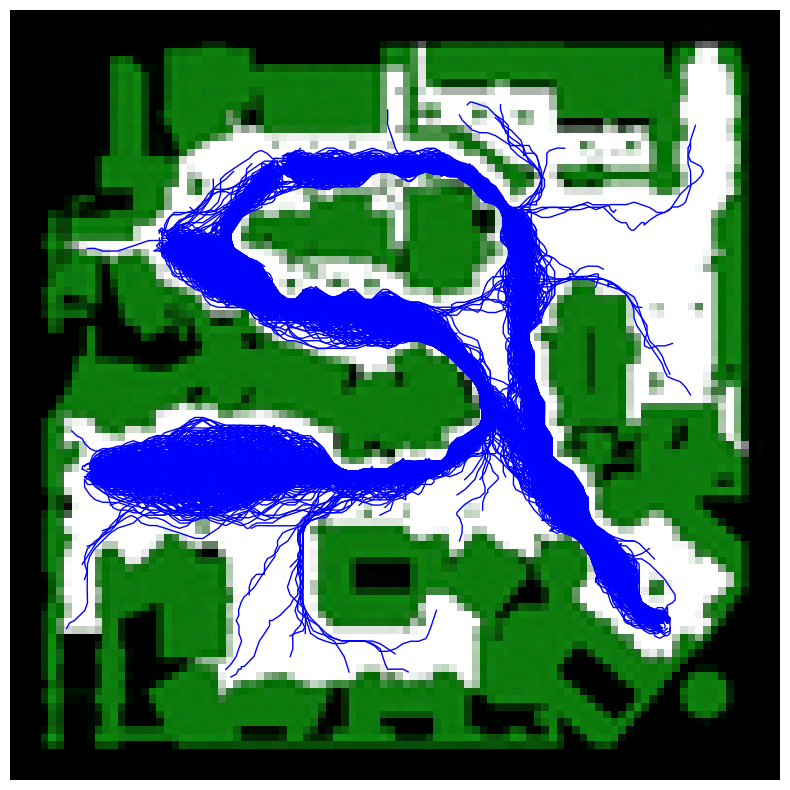

In [6]:
### Check CoRL data

### Initial v2: 961
### Update: 879
### Total: 1840

import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os

plt.clf()
plt.close('all')
plt.figure(figsize=(10, 10))
plt.subplot(111, facecolor='grey')
img = plt.imread(f"den_small.png")

# traj_file = "mapf_corl_rebuttal/raw_traj_all/paths_den_corl_combine_initialv2.csv"
traj_file = "mapf_corl_rebuttal/raw_traj_all/paths_den_corl_combine_update.csv"

df = pd.read_csv(traj_file, header=None)
df.columns = ['time', 'person_id', 'x', 'y', 'velocity', 'motion_angle']
#### Get df for each person_id
person_ids = df['person_id'].unique()
print(len(person_ids))
for pid in person_ids:
    person_df = df[df['person_id'] == pid]
    plt.imshow(img, cmap='gray', vmin=0, vmax=255, extent=[0, 100, 0, 100])
    plt.plot(person_df['x'], person_df['y'], linewidth=1, color='blue')

plt.axis('off')

os.makedirs(f"mapf_corl_rebuttal/raw_traj_all/figures", exist_ok=True)
# plt.savefig(f"mapf_corl_rebuttal/raw_traj_all/figures/paths_den_corl_combine_initialv2.png", dpi=100)
plt.savefig(f"mapf_corl_rebuttal/raw_traj_all/figures/paths_den_corl_combine_update.png", dpi=100)